## Step 1: Importing Required Libraries
In this section, we import all the necessary libraries and modules required for building and training a deep learning model for text classification. This includes:

- **TensorFlow & Keras**: For building and training the neural network (e.g., LSTM, Conv1D).
- **Pandas & NumPy**: For data handling and numerical operations.
- **Matplotlib**: For plotting and visualizations.
- **Scikit-learn**: For dataset splitting.
- **Google Colab Drive**: For loading data from Google Drive.
- **Keras Regularizers**: To apply regularization (e.g., L2) in neural network layers.

In [ ]:
# needed libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
from tensorflow.keras.regularizers import l2


## Step 2: Accessing the Dataset from Google Drive

To access the dataset stored in Google Drive:

- **Mount Google Drive** to the Colab environment so files can be accessed as if they're local.
- **Define the file path** to the CSV dataset, which contains the text data for training the abusive content detection model.


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')
# Define the file path in Google Drive
file_path = "/content/drive/MyDrive/Adv_DS/Accepted/abusive_dataset_content/updated_dataset.csv"

Mounted at /content/drive


## Step 3: Load and Clean the Dataset

- **Read the CSV file** from the specified path using `pandas`.
- **Drop any rows with missing values** to avoid issues during training.
- **Filter out rows labeled as `'Error'`** to ensure the dataset only contains valid labeled samples.
- **Display the first few rows** to get a quick look at the data structure.


In [ ]:
# 2️⃣ **تحميل البيانات**
df = pd.read_csv(file_path)  # Read the data
df.dropna(inplace=True)  # Remove empty values

df = df[df['Label'] != 'Error']

# Display the data
print(df.head())

                                                text  \
0  النعال المريحة أرتدي هذه النعال كثيرافهي دافئة...   
1  منتج جميل ، خدمة سيئة لقد اشتريت زوجا من النعا...   
2  جيد للأشياء الصغيرة هذا يعمل بشكل جيد لالتقاط ...   
3  واهية للغاية  للغاية ، فأنت تشتريه ، كن حذرا ج...   
4  ، والأشخاص الذين يحبون الضحك عليك فقط أن تبتسم...   

                                              tokens  \
0  ['النعال', 'المريحة', 'أرتدي', 'هذه', 'النعال'...   
1  ['منتج', 'جميل', '،', 'خدمة', 'سيئة', 'لقد', '...   
2  ['جيد', 'للأشياء', 'الصغيرة', 'هذا', 'يعمل', '...   
3  ['واهية', 'للغاية', 'للغاية', '،', 'فأنت', 'تش...   
4  ['،', 'والأشخاص', 'الذين', 'يحبون', 'الضحك', '...   

                                     filtered_tokens  \
0  ['النعال', 'المريحة', 'أرتدي', 'النعال', 'كثير...   
1  ['منتج', 'جميل', '،', 'خدمة', 'سيئة', 'لقد', '...   
2  ['جيد', 'للأشياء', 'الصغيرة', 'يعمل', 'بشكل', ...   
3  ['واهية', 'للغاية', 'للغاية', '،', 'فأنت', 'تش...   
4  ['،', 'والأشخاص', 'يحبون', 'الضحك', 'فقط', 

In [ ]:
df

,text,tokens,filtered_tokens,stemmed_tokens,Label
0,النعال المريحة أرتدي هذه النعال كثيرافهي دافئة...,"['النعال', 'المريحة', 'أرتدي', 'هذه', 'النعال'...","['النعال', 'المريحة', 'أرتدي', 'النعال', 'كثير...","['نعل', 'ريح', 'ردي', 'نعل', 'كثيرافهي', 'دفئ'...",P
1,منتج جميل ، خدمة سيئة لقد اشتريت زوجا من النعا...,"['منتج', 'جميل', '،', 'خدمة', 'سيئة', 'لقد', '...","['منتج', 'جميل', '،', 'خدمة', 'سيئة', 'لقد', '...","['نتج', 'جمل', '،', 'خدم', 'سيئ', 'لقد', 'شري'...",N
2,جيد للأشياء الصغيرة هذا يعمل بشكل جيد لالتقاط ...,"['جيد', 'للأشياء', 'الصغيرة', 'هذا', 'يعمل', '...","['جيد', 'للأشياء', 'الصغيرة', 'يعمل', 'بشكل', ...","['جيد', 'شيء', 'صغر', 'عمل', 'شكل', 'جيد', 'لق...",N
3,واهية للغاية للغاية ، فأنت تشتريه ، كن حذرا ج...,"['واهية', 'للغاية', 'للغاية', '،', 'فأنت', 'تش...","['واهية', 'للغاية', 'للغاية', '،', 'فأنت', 'تش...","['وهي', 'غية', 'غية', '،', 'فأن', 'شري', '،', ...",N
4,، والأشخاص الذين يحبون الضحك عليك فقط أن تبتسم...,"['،', 'والأشخاص', 'الذين', 'يحبون', 'الضحك', '...","['،', 'والأشخاص', 'يحبون', 'الضحك', 'فقط', 'تب...","['،', 'شخص', 'يحب', 'ضحك', 'فقط', 'بسم', 'عند'...",N
...,...,...,...,...,...
690336,هاي باهي وليت تفهم في اللبسة متاع الرجال,"['هاي', 'باهي', 'وليت', 'تفهم', 'في', 'اللبسة'...","['هاي', 'باهي', 'وليت', 'تفهم', 'اللبسة', 'متا...","['هاي', 'بهي', 'ولت', 'فهم', 'لبس', 'تاع', 'رجل']",N
690337,ريي يصبر امها,"['ريي', 'يصبر', 'امها']","['ريي', 'يصبر', 'امها']","['ريي', 'صبر', 'امه']",N
690338,اللهم امين يارب العالمين ربي يصبر أهلهم,"['اللهم', 'امين', 'يارب', 'العالمين', 'ربي', '...","['اللهم', 'امين', 'يارب', 'العالمين', 'ربي', '...","['لهم', 'امن', 'يرب', 'علم', 'ربي', 'صبر', 'اهل']",P
690339,اللهم امين يارب العالمين مخيبها عواشر لا حول و...,"['اللهم', 'امين', 'يارب', 'العالمين', 'مخيبها'...","['اللهم', 'امين', 'يارب', 'العالمين', 'مخيبها'...","['لهم', 'امن', 'يرب', 'علم', 'خيب', 'عشر', 'حو...",N


In [ ]:
# prompt:  to see all df label
print(df['Label'].unique())

['P' 'N']


## Step 4: Balance the Dataset Classes

The dataset may be imbalanced (e.g., more non-abusive than abusive samples). To ensure fair training:

- **Split the dataset by label**: 'N' (non-abusive) and 'P' (potentially abusive).
- **Define the total number of samples** to use (e.g., 686,932), and **split equally between both classes**.
- **Randomly sample** an equal number of rows from each class.
- **Combine and shuffle** the sampled data to ensure randomness.
- **Print the new class distribution** to confirm balance.


In [ ]:
# making dataset classes balanced as possible
import pandas as pd

# Assuming your dataset is in a DataFrame called `df`
# Separate the classes
df_N = df[df['Label'] == 'N']
df_P = df[df['Label'] == 'P']

# Define the number of rows you want to use (e.g., 100k or 50k)
num_samples = 686932     # You can change this to 50000 as needed

# Ensure balanced sampling by taking half from each class
num_per_class = num_samples // 2  # Divide the total samples equally

# Sample equal number from each class
df_N_sampled = df_N.sample(n=min(num_per_class, len(df_N)), random_state=42)
df_P_sampled = df_P.sample(n=min(num_per_class, len(df_P)), random_state=42)

# Combine and shuffle the sampled data
df_sampled = pd.concat([df_N_sampled, df_P_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Display the balanced class distribution
print("Class distribution after balancing:")
print(df_sampled['Label'].value_counts())

# Optionally, check the class distribution before sampling
print("\nClass distribution before balancing:")
print(df['Label'].value_counts())


Class distribution after balancing:
Label
N    343466
P    257846
Name: count, dtype: int64

Class distribution before balancing:
Label
N    429086
P    257846
Name: count, dtype: int64


## Step 5: Calculate Label Frequencies

This step is used to **analyze the distribution of labels** in the original dataset:

- Count how many times each label (`'N'` or `'P'`) appears using `value_counts()`.
- This helps in understanding class imbalance before or after sampling.
- In this case, the code resets `df_sampled` to the full dataset before checking frequencies.


In [ ]:
# Calculate label frequencies\
label_frequencies = df['Label'].value_counts()
df_sampled=df
#label_frequencies = df_sampled['Label'].value_counts()
# Print the frequencies
label_frequencies

,count
Label,
N,429086
P,257846


## Step 6: Data Preparation and Text Tokenization

This step prepares the text data for training a deep learning model:

1. **Extract Text and Labels**:
   - Convert the text column to a list.
   - Map labels to numeric values: `'N'` → `0`, `'P'` → `1`.

2. **Train-Test Split**:
   - Split the dataset into 90% training and 10% testing.
   - Use `stratify` to keep label proportions consistent.

3. **Tokenization**:
   - Convert text into sequences of integers using Keras’ `Tokenizer`.
   - Limit vocabulary size (`max_words = 30,000`) and mark out-of-vocabulary tokens.

4. **Padding**:
   - Pad all sequences to a fixed length (`max_length = 400`) for uniform input shape.

5. **Final Preparation**:
   - Convert labels into NumPy arrays (no need for one-hot encoding in binary classification).


In [ ]:
#Data Preparation  90% training 10% testing
texts = df_sampled["text"].astype(str).tolist()
labels = df_sampled["Label"].tolist()

# Convert labels to numeric values (0: Negative, 1: Positive)
label_map = {"N": 0, "P": 1}
labels = [label_map[label] for label in labels]  # Numerical labels

# Split FIRST to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    texts,
    labels,
    test_size=0.10,  # Better split ratio
    random_state=42,
    stratify=labels  # Preserve class balance
)

# Convert to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# (Use 1 output unit with sigmoid activation)

In [ ]:
# Tokenize Text to number before training
max_words = 30000  # Maximum number of unique words
max_length = 400  # Maximum length of each sentence after padding

tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to ensure uniform length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Convert the labels to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

## Step 7: Build the CNN + BiLSTM Model Architecture

This model combines Convolutional Neural Networks (CNNs) and a Bidirectional LSTM to extract both local and sequential features from the text:

1. **Input Layer**:
   - Accepts padded sequences of fixed length.

2. **Embedding Layer**:
   - Converts word indices to dense vectors of fixed size (`embedding_dim = 400`).

3. **CNN Layers**:
   - Two stacked 1D Convolution layers extract local n-gram features from the embeddings.
   - Batch normalization is applied after each CNN layer to stabilize training.

4. **Bidirectional LSTM**:
   - Captures long-term dependencies in both forward and backward directions.

5. **Dropout Layer**:
   - Reduces overfitting by randomly disabling 80% of neurons during training.

6. **Output Layer**:
   - A single neuron with sigmoid activation for binary classification (abusive or not).
   - L2 regularization is applied to penalize complex models and reduce overfitting.

7. **Compilation**:
   - Optimizer: `AdamW` (Adam with weight decay).
   - Loss function: `binary_crossentropy` (suitable for binary classification).
   - Metric: `accuracy`.

Model summary is printed at the end to show layer-wise architecture.


In [ ]:
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalAveragePooling1D, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import LSTM, Bidirectional
embedding_dim =400
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)(input_layer)

# CNN
cnn_layer = Conv1D(filters=32, kernel_size=6, activation='relu', padding='same')(embedding_layer)
cnn_layer = BatchNormalization()(cnn_layer)
cnn_layer = Conv1D(filters=16, kernel_size=6, activation='relu', padding='same')(cnn_layer)
cnn_layer = BatchNormalization()(cnn_layer)

# BiLTSM
bilstm_layer = Bidirectional(LSTM(8, return_sequences=False))(cnn_layer)
dropout_layer = Dropout(0.8)(bilstm_layer)

output_layer = Dense(1, activation='sigmoid', kernel_regularizer=l2(0.06))(dropout_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=AdamW(learning_rate=0.00005, weight_decay=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 400, 400)       │    12,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 400, 32)        │        76,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 400, 32)        │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 400, 16)        │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 400, 16)        │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,081,729 (46.09 MB)

 Trainable params: 12,081,633 (46.09 MB)

 Non-trainable params: 96 (384.00 B)

## Step 8: Model Training with Callbacks

In this stage, the model is trained on the prepared data using key training strategies:

1. **EarlyStopping**:
   - Monitors validation loss.
   - Stops training if no improvement after 5 epochs.
   - Restores the best model weights to avoid overfitting.

2. **ReduceLROnPlateau**:
   - Reduces the learning rate by a factor of 0.2 if validation loss doesn't improve for 3 epochs.
   - Prevents the model from getting stuck by allowing finer learning at plateaus.

3. **Training Configuration**:
   - Uses a batch size of 64 and trains up to 200 epochs.
   - Validates on the test set after each epoch.
   - Both callbacks are included to enhance training efficiency and performance.


In [ ]:
# Trainig stage with early stopping
# Define Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Define Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,  # Reduce learning rate by 20%
    patience=3,  # If no improvement for 3 epochs
    min_lr=1e-6,
    verbose=1
)

# Train the Model
history = model.fit(
    X_train_pad, y_train,
    epochs=200,
    batch_size=64,
    validation_data=(X_test_pad, y_test),
    callbacks=[reduce_lr, early_stop]  # Add both ReduceLROnPlateau and EarlyStopping
)

Epoch 1/200
9660/9660 ━━━━━━━━━━━━━━━━━━━━ 433s 44ms/step - accuracy: 0.6493 - loss: 0.7092 - val_accuracy: 0.8158 - val_loss: 0.4841 - learning_rate: 5.0000e-05
Epoch 2/200
9660/9660 ━━━━━━━━━━━━━━━━━━━━ 437s 44ms/step - accuracy: 0.7799 - loss: 0.5115 - val_accuracy: 0.8006 - val_loss: 0.4714 - learning_rate: 5.0000e-05
Epoch 3/200
9660/9660 ━━━━━━━━━━━━━━━━━━━━ 427s 44ms/step - accuracy: 0.8064 - loss: 0.4713 - val_accuracy: 0.8330 - val_loss: 0.4357 - learning_rate: 5.0000e-05
Epoch 4/200
9660/9660 ━━━━━━━━━━━━━━━━━━━━ 434s 43ms/step - accuracy: 0.8287 - loss: 0.4378 - val_accuracy: 0.8324 - val_loss: 0.4396 - learning_rate: 5.0000e-05
Epoch 5/200
9660/9660 ━━━━━━━━━━━━━━━━━━━━ 441s 43ms/step - accuracy: 0.8463 - loss: 0.4084 - val_accuracy: 0.8312 - val_loss: 0.4431 - learning_rate: 5.0000e-05
Epoch 6/200
9659/9660 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8591 - loss: 0.3841
Epoch 6: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
9660/9660 ━━━━━━━━━━━━━━

## Step 9: Model Evaluation and Overfitting Analysis

In this step, we assess how well the model performs on unseen data and analyze its learning behavior over time.

###  **Evaluate on Test Data**
This evaluates the trained model on the test dataset.

It returns the loss and accuracy, giving an indication of how well the model generalizes.

A high test accuracy and low loss imply good generalization.



In [ ]:
# model Evaluation
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

2147/2147 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.8345 - loss: 0.4345
Loss: 0.4357, Accuracy: 0.8330


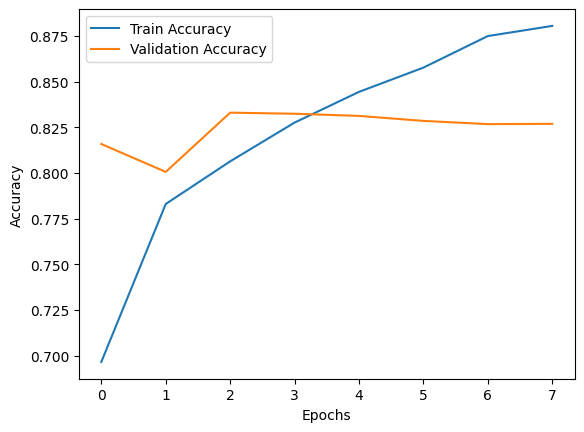

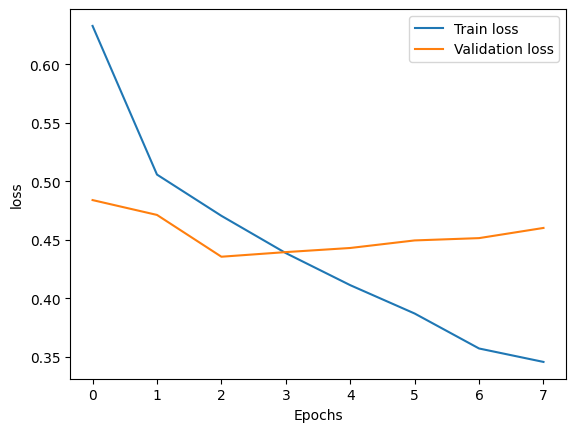

In [ ]:
# loss and accuracy for Train and test to show model Over or underfitting
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Step 10: Saving the Trained Model and Tokenizer

To reuse the trained model later or deploy it, we save both the model and the tokenizer. This ensures the text preprocessing during inference matches the training phase.

### 1. **Save the Model**
Saves the entire model architecture, weights, and optimizer state.

File format .h5 (HDF5) is commonly used for saving Keras models.

Stored directly to Google Drive for persistence across sessions.
### 2. Save the Tokenizer
Serializes the tokenizer object using pickle and saves it as a .pickle file.

Ensures the same tokenization logic can be used during inference or further training.

Downloads the saved tokenizer to  local machine for use outside Colab.

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/DS_Colab_Projects/sentiment_model2.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

with open('/content/drive/MyDrive/DS_Colab_Projects/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

files.download('/content/drive/MyDrive/DS_Colab_Projects/tokenizer.pickle')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

# Define the path to save the model in Google Drive
model_save_path = "/content/drive/MyDrive/DS_Colab_Projects/sentiment_model2.h5"

# Save the model
model.save(model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/drive/MyDrive/DS_Colab_Projects/sentiment_model2.h5


## Step 11: Loading the Model and Making Predictions

In this step, we demonstrate how to load the saved model and tokenizer, preprocess new input text, and perform sentiment predictions.

---

### 1. **Mount Google Drive**
Connects Google Drive to the Colab environment.

Ensures access to saved model files and tokenizer.

### 2. Load the Trained Model

Loads the trained model from the saved .h5 file.

Enables us to use the model without retraining.
### 3. Prepare New Text Data for Prediction
New Arabic text samples are provided for inference.

The tokenizer (previously fitted on training data) is used to convert text to sequences.

pad_sequences ensures the input size matches what the model expects (maxlen).
### 4. Predict Sentiments
Predicts sentiment scores using the trained model.

Applies a threshold of 0.5:

P (Positive) if score ≥ 0.5

N (Negative) if score < 0.5

Also calculates confidence levels for each prediction.



In [ ]:
# Load Model and Tokenizer for Prediction
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the saved model
model_save_path = "/content/drive/MyDrive/DS_Colab_Projects/sentiment_model2.h5"
loaded_model = load_model(model_save_path)
print("Model loaded successfully.")

# Load the saved tokenizer
tokenizer_path = "/content/drive/MyDrive/DS_Colab_Projects/tokenizer.pickle"
with open(tokenizer_path, 'rb') as handle:
    tokenizer = pickle.load(handle)
print("Tokenizer loaded successfully.")

# Example Predictions
new_texts = [
    "الفيلم كان ممل جدًا وضاع وقتي عليه",                  # 1-Negative
    "خدمة العملاء كانت ممتازة وتعامل راقي جدًا",           # 2-Positive
    "ياخي المباراة اليوم كانت كارثة بكل معنى الكلمة",   # 3-Negative
    "التطبيق سهل الاستخدام والتصميم جميل",                # 4-Positive
    "ما توقعت المنتج يوصل بسرعة كذا، شكراً لكم",         # 5-Positive
    "والله تجربة سيئة ولن أكررها أبدًا",                 # 6-Negative
    "الوجبة كانت لذيذة والخدمة سريعة",                  # 7-Positive
    "مافي شي أعجبني في هذا المكان، تجربة سيئة",        # 8-Negative
    "شكراً على التحديث الجديد، الأداء صار أفضل بكثير",   # 9-Positive
    "ليش الأسعار مرتفعة جدًا؟ ما يستاهل الصراحة"         # 10-Negative
]

# Tokenize and pad the new texts
max_length = 400  # or whatever was used during training
new_text_seq = tokenizer.texts_to_sequences(new_texts)
new_text_pad = pad_sequences(new_text_seq, maxlen=max_length)

# Make predictions using the loaded model
predictions = loaded_model.predict(new_text_pad)
predicted_labels = ["N" if pred < 0.5 else "P" for pred in predictions.flatten()]
confidences = [pred[0] if label == "P" else 1 - pred[0] for pred, label in zip(predictions, predicted_labels)]

# Print results
for i, (text, label, confidence) in enumerate(zip(new_texts, predicted_labels, confidences)):
    print(f"{i+1}- Text: {text}")
    print(f"Predicted Label: {label} (Confidence: {confidence:.4f})\n")
# 7 of 10 text are Correct and tha accuracy of Model was 83%

Mounted at /content/drive


Model loaded successfully.
Tokenizer loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1- Text: الفيلم كان ممل جدًا وضاع وقتي عليه
Predicted Label: N (Confidence: 0.8485)

2- Text: خدمة العملاء كانت ممتازة وتعامل راقي جدًا
Predicted Label: P (Confidence: 0.7387)

3- Text: ياخي المباراة اليوم كانت كارثة بكل معنى الكلمة
Predicted Label: N (Confidence: 0.8256)

4- Text: التطبيق سهل الاستخدام والتصميم جميل
Predicted Label: P (Confidence: 0.7272)

5- Text: ما توقعت المنتج يوصل بسرعة كذا، شكراً لكم
Predicted Label: N (Confidence: 0.5600)

6- Text: والله تجربة سيئة ولن أكررها أبدًا
Predicted Label: P (Confidence: 0.5278)

7- Text: الوجبة كانت لذيذة والخدمة سريعة
Predicted Label: P (Confidence: 0.6684)

8- Text: مافي شي أعجبني في هذا المكان، تجربة سيئة
Predicted Label: P (Confidence: 0.5577)

9- Text: شكراً على التحديث الجديد، الأداء صار أفضل بكثير
Predicted Label: P (Confidence: 0.7152)

10- Text: ليش الأسعار مرتفعة جدًا؟ ما يستاهل الصراحة
Predicted Label: N (Confidence: 0.7451)

